# Import Libraries 

In [41]:
import datetime
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup 
import datetime
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
#Current Data Checks for ME

# - Difference in sum of cases by race v. Total cases

# - Difference in sum of cases by ethnicity v. Total cases (Within 5 values)

# - Difference in sum of deaths by race versus Total deaths (Within 5 values)

# - Difference in sum of deaths by ethnicity v. Total deaths (Within 5 values)



#These Data Checks are also included for ME, however in the Public CRDT hospital data is not listed.

# - Difference in sum of hopsital by hospital by race versus Total hospital might not be avaible

# - Difference in sum of hopsital by hospital by race versus Total hospital might not be avaible


#Variables needed
# 1) Sum of cases by Race
# 2) Sum of Cases by ethnicity
# 3) Sum of Deaths by Race
# 4) Sum of Deaths by Ethnicity
# 4) Total Cases
# 5) Total Deaths

## Downloading the Public CSV from CRDT

In [43]:
public_csv = pd.read_csv("https://docs.google.com/spreadsheets/d/1xF1cdazAejukTt2M6-aAXWG6fivTHFqt8rurF8euXOE/export?format=csv&gid=43720681")

## Defining Maine Covid Summary from the Public CSV

In [44]:
maine_covid_summary = public_csv[public_csv['State']== 'ME']

## Getting Total Cases in Maine from Covid

In [45]:
#In order to find Total Cases Each Day need to subtract next row from previous row
#However first need to convert column type to float
maine_covid_summary['Cases_Total'] = maine_covid_summary['Cases_Total'].astype(float)
cases_each_day = maine_covid_summary['Cases_Total'].diff(periods=-1)

#Adding Cases Each Day as a column
maine_covid_summary['Cases Each Day'] = cases_each_day

#Summing Cases Each Day column to see the Total Covid Cases Reported in Maine
#Do not see method on how to sum column, so will take 20201104 Date Cases_Total as the total number of cases
#for now

total_cases = 7077

<ipython-input-45-9c8579520f03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases_Total'] = maine_covid_summary['Cases_Total'].astype(float)
<ipython-input-45-9c8579520f03>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases Each Day'] = cases_each_day


## Getting Total Deaths in Maine from Covid

In [46]:
#Apply the same method
maine_covid_summary['Deaths_Total'] = maine_covid_summary['Deaths_Total'].astype(float)
deaths_each_day = maine_covid_summary['Deaths_Total'].diff(periods=-1)

#Adding Cases Each Day as a column
maine_covid_summary['Deaths Each Day'] = deaths_each_day

#Summing Deaths Each Day column to see the Total Covid Cases Reported in Maine
#Do not see method on how to sum column, so will take 20201104 Date Deaths_Total as the total number of cases
#for now

total_deaths = 150


<ipython-input-46-74396dfe2303>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Deaths_Total'] = maine_covid_summary['Deaths_Total'].astype(float)
<ipython-input-46-74396dfe2303>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Deaths Each Day'] = deaths_each_day


## Finding Sum of total Cases by Race

In [48]:
#Want to Sum total cases of each race together
#Includes other and unknown

#Cases_White
maine_covid_summary['Cases_White'] = maine_covid_summary['Cases_White'].astype(float)
cases_white = maine_covid_summary['Cases_White'].diff(periods=-1)
maine_covid_summary['Cases Each Day: White'] = cases_white

#Cases_Black
maine_covid_summary['Cases_Black'] = maine_covid_summary['Cases_Black'].astype(float)
cases_black = maine_covid_summary['Cases_Black'].diff(periods=-1)
maine_covid_summary['Cases Each Day: Black'] = cases_black

#Cases_LatinX
maine_covid_summary['Cases_LatinX'] = maine_covid_summary['Cases_LatinX'].astype(float)
cases_latinx = maine_covid_summary['Cases_LatinX'].diff(periods=-1)
maine_covid_summary['Cases Each Day: LatinX'] = cases_latinx

#Cases_Asian
maine_covid_summary['Cases_Asian'] = maine_covid_summary['Cases_Asian'].astype(float)
cases_asian = maine_covid_summary['Cases_Asian'].diff(periods=-1)
maine_covid_summary['Cases Each Day: Asian'] = cases_asian

#Cases_AIAN
maine_covid_summary['Cases_AIAN'] = maine_covid_summary['Cases_AIAN'].astype(float)
cases_aian = maine_covid_summary['Cases_AIAN'].diff(periods=-1)
maine_covid_summary['Cases Each Day: AIAN'] = cases_aian

#Cases_NHPI
maine_covid_summary['Cases_NHPI'] = maine_covid_summary['Cases_NHPI'].astype(float)
cases_nhpi = maine_covid_summary['Cases_NHPI'].diff(periods=-1)
maine_covid_summary['Cases Each Day: NHPI'] = cases_nhpi

#Cases_Multiracial
maine_covid_summary['Cases_Multiracial'] = maine_covid_summary['Cases_Multiracial'].astype(float)
cases_multiracial = maine_covid_summary['Cases_Multiracial'].diff(periods=-1)
maine_covid_summary['Cases Each Day: Multiracial'] = cases_multiracial

#Cases_Other
maine_covid_summary['Cases_Other'] = maine_covid_summary['Cases_Other'].astype(float)
cases_other = maine_covid_summary['Cases_Other'].diff(periods=-1)
maine_covid_summary['Cases Each Day: Other'] = cases_other

#Cases_Unknown
maine_covid_summary['Cases_Unknown'] = maine_covid_summary['Cases_Unknown'].astype(float)
cases_unknown = maine_covid_summary['Cases_Unknown'].diff(periods=-1)
maine_covid_summary['Cases Each Day: Race Unknown'] = cases_unknown

#Again would sum each new case column, however not too sure about syntax, will update later
#Once obtain absolute sum of each case by specificed race, would add all together to get a total for cases with race

sum_cases_by_race

<ipython-input-48-f0cd36685ea5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases_White'] = maine_covid_summary['Cases_White'].astype(float)
<ipython-input-48-f0cd36685ea5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases Each Day: White'] = cases_white
<ipython-input-48-f0cd36685ea5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

## Finding Sum of Total Cases by Ethnicity

In [49]:
#Want to Sum total cases of each ethnicity together
#Includes unknown


#Cases_Ethnicity_Hispanic
maine_covid_summary['Cases_Ethnicity_Hispanic'] = maine_covid_summary['Cases_Ethnicity_Hispanic'].astype(float)
cases_ethnicity_hispanic = maine_covid_summary['Cases_Ethnicity_Hispanic'].diff(periods=-1)
maine_covid_summary['Cases Each Day: Hispanic'] = cases_ethnicity_hispanic

#Cases_Ethnicity_NonHispanic
maine_covid_summary['Cases_Ethnicity_NonHispanic'] = maine_covid_summary['Cases_Ethnicity_NonHispanic'].astype(float)
cases_ethnicity_nonhispanic = maine_covid_summary['Cases_Ethnicity_NonHispanic'].diff(periods=-1)
maine_covid_summary['Cases Each Day: NonHispanic'] = cases_ethnicity_nonhispanic

#Cases_Ethnicity_Unknown
maine_covid_summary['Cases_Ethnicity_Unknown'] = maine_covid_summary['Cases_Ethnicity_Unknown'].astype(float)
cases_ethnicity_unknown = maine_covid_summary['Cases_Ethnicity_Unknown'].diff(periods=-1)
maine_covid_summary['Cases Each Day: Ethnicity Uknown'] = cases_ethnicity_unknown

#Again would sum each new case column, however not too sure about syntax, will update later
#Once obtain absolute sum of each case by specificed ethnicity, would add all together to get a total for cases with ethnicity

sum_cases_by_ethnicity

<ipython-input-49-240db44e47c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases_Ethnicity_Hispanic'] = maine_covid_summary['Cases_Ethnicity_Hispanic'].astype(float)
<ipython-input-49-240db44e47c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases Each Day: Hispanic'] = cases_ethnicity_hispanic
<ipython-input-49-240db44e47c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

## Finding Sum of Total Deaths by Race

In [ ]:
#Want to Sum total deaths of each race together
#Includes other and unknown

#Deaths_White
maine_covid_summary['Deaths_White'] = maine_covid_summary['Deaths_White'].astype(float)
deaths_white = maine_covid_summary['Deaths_White'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: White'] = deaths_white

#Deaths_Black
maine_covid_summary['Deaths_Black'] = maine_covid_summary['Deaths_Black'].astype(float)
cases_black = maine_covid_summary['Deaths_Black'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: Black'] = deaths_black

#Deaths_LatinX
maine_covid_summary['Deaths_LatinX'] = maine_covid_summary['Deaths_LatinX'].astype(float)
cases_latinx = maine_covid_summary['Deaths_LatinX'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: LatinX'] = deaths_latinx

#Deaths_Asian
maine_covid_summary['Deaths_Asian'] = maine_covid_summary['Deaths_Asian'].astype(float)
cases_asian = maine_covid_summary['Deaths_Asian'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: Asian'] = deaths_asian

#Deaths_AIAN
maine_covid_summary['Deaths_AIAN'] = maine_covid_summary['Deaths_AIAN'].astype(float)
cases_aian = maine_covid_summary['Deaths_AIAN'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: AIAN'] = deaths_aian

#Deaths_NHPI
maine_covid_summary['Deaths_NHPI'] = maine_covid_summary['Deaths_NHPI'].astype(float)
cases_nhpi = maine_covid_summary['Deaths_NHPI'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: NHPI'] = deaths_nhpi

#Deaths_Multiracial
maine_covid_summary['Deaths_Multiracial'] = maine_covid_summary['Deaths_Multiracial'].astype(float)
cases_multiracial = maine_covid_summary['Deaths_Multiracial'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: Multiracial'] = deaths_multiracial

#Deaths_Other
maine_covid_summary['Deaths_Other'] = maine_covid_summary['Deaths_Other'].astype(float)
cases_other = maine_covid_summary['Deaths_Other'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: Other'] = deaths_other

#Deaths_Unknown
maine_covid_summary['Deaths_Unknown'] = maine_covid_summary['Deaths_Unknown'].astype(float)
cases_unknown = maine_covid_summary['Deaths_Unknown'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: Race Unknown'] = deaths_unknown

sum_deaths_by_race

#Again would sum each new case column, however not too sure about syntax, will update later
#Once obtain absolute sum of each case by specificed race, would add all together to get a total for deaths with race

In [ ]:
#Want to Sum total cases of each ethnicity together
#Includes unknown


#Deaths_Ethnicity_Hispanic
maine_covid_summary['Deaths_Ethnicity_Hispanic'] = maine_covid_summary['Deaths_Ethnicity_Hispanic'].astype(float)
cases_ethnicity_hispanic = maine_covid_summary['Deaths_Ethnicity_Hispanic'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: Hispanic'] = deaths_ethnicity_hispanic

#Deaths_Ethnicity_NonHispanic
maine_covid_summary['Deaths_Ethnicity_NonHispanic'] = maine_covid_summary['Deaths_Ethnicity_NonHispanic'].astype(float)
cases_ethnicity_nonhispanic = maine_covid_summary['Deaths_Ethnicity_NonHispanic'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: NonHispanic'] = deaths_ethnicity_nonhispanic

#Deaths_Ethnicity_Unknown
maine_covid_summary['Deaths_Ethnicity_Unknown'] = maine_covid_summary['Deaths_Ethnicity_Unknown'].astype(float)
cases_ethnicity_unknown = maine_covid_summary['Deaths_Ethnicity_Unknown'].diff(periods=-1)
maine_covid_summary['Deaths Each Day: Ethnicity Uknown'] = deaths_ethnicity_unknown

sum_deaths_by_ethnicity

#Again would sum each new case column, however not too sure about syntax, will update later
#Once obtain absolute sum of each case by specificed ethnicity, would add all together to get a total for deaths with ethnicity

## Data Quality Checking Clause

In [50]:
#Currently have invalid syntax, will fix later.

if(total_cases - sum_cases_by_race > 5)
    print("Data Quality Check Needed.")

if(total_cases - sum_cases_by_ethnicity > 5)
    print("Data Quality Check Needed.")
    
if(total_deaths - sum_deaths_by_race > 5)
    print("Data Quality Check Needed.")

if(total_deaths - sum_deaths_by_ethnicity > 5)
    print("Data Quality Check Needed.")
    
    

SyntaxError: invalid syntax (<ipython-input-50-3eff31f9fa56>, line 1)

## Time Series Plot

<AxesSubplot:title={'center':'Cases Each DAy % Timeseries'}, xlabel='Date'>

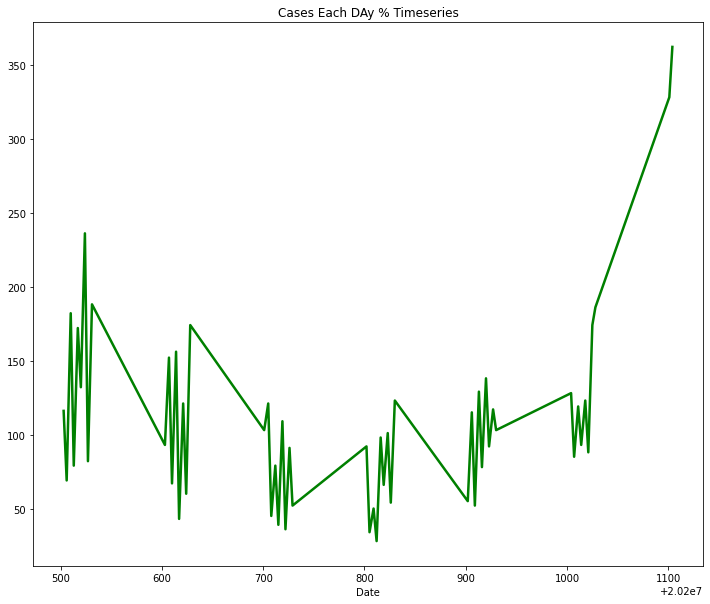

In [51]:
maine_covid_summary.set_index('Date')['Cases Each Day'].plot(figsize=(12, 10), title='Cases Each Day % Timeseries'
                                                                        ,linewidth=2.5, color='green')
#Probably have to reconfigure dates. I think it messes with the plot.
